<a href="https://colab.research.google.com/github/Robin-01/California-Coastal-Sea-Currents/blob/main/SST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install podaac-data-subscriber

In [ ]:
from google.colab import drive
import getpass
import os

# This cell will prompt you to enter your credentials securely.
print("Please enter your Earthdata Login credentials:")
username = getpass.getpass('Username: ')
password = getpass.getpass('Password: ')

# Create the .netrc file content
netrc_content = f"""machine urs.earthdata.nasa.gov
    login {username}
    password {password}"""

# Write the .netrc file to the root directory
with open('/root/.netrc', 'w') as f:
    f.write(netrc_content)

# !!! CRITICAL FIX: Change the permissions of the .netrc file !!!
# This command makes the file readable and writable only by the owner (you)
!chmod 600 /root/.netrc

print("\n.netrc file created and secured successfully! Authentication is configured.")

Please enter your Earthdata Login credentials:
Username: ··········
Password: ··········

.netrc file created and secured successfully! Authentication is configured.


In [ ]:
# Create a directory for the test data
!mkdir -p ./mur_data_test

# Test command: Download only 3 days
!podaac-data-downloader -c MUR-JPL-L4-GLOB-v4.1 -d ./mur_data_test --start-date 2024-11-01T09:00:00Z --end-date 2025-01-01T09:00:00Z #CHANGE ACCORDINGLY

# List the downloaded files to verify
print("\nDownloaded files:")
!ls -la ./mur_data_test/

[2025-08-20 04:05:32,698] {podaac_data_downloader.py:317} INFO - Found 62 total files to download
[2025-08-20 04:05:55,958] {podaac_data_downloader.py:358} INFO - 2025-08-20 04:05:55.958251 SUCCESS: https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/20250101090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc
[2025-08-20 04:06:20,465] {podaac_data_downloader.py:358} INFO - 2025-08-20 04:06:20.465274 SUCCESS: https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/20241231090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc
[2025-08-20 04:06:34,868] {podaac_data_downloader.py:358} INFO - 2025-08-20 04:06:34.868632 SUCCESS: https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/20241230090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc
[2025-08-20 04:06:49,950] {podaac_data_downloader.py:358} INFO - 2025-08-20 04:06:49.950682 SUCCESS: https://archive.podaac.earthdata.nasa.g

In [ ]:
import pandas as pd    #dataframe to work with tables
import numpy as np     #for general calculations with arrays
!pip install pycmap
!pip install cartopy
import pycmap          #API for querrying the data from CMAP

import plotly.express as px   #makes nice interactive plots


import cartopy.crs as ccrs         # to plot maps with different projections
import cartopy.feature as cfeature # to plot coastlines, land, borders, etc.
import matplotlib.pyplot as plt  #makes regular plots

from matplotlib.colors import LogNorm  #to make logarithmic colormap axis

import xarray as xr  #to work with data

from scipy.interpolate import griddata   #interpolate irregularly spaced data onto a grid


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.9/421.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 45.2 MB/s eta 0:00:00


# Task
Animate the `analysed_sst` data around California from all NetCDF files in the "/content/mur_data_test/" directory.

## List files

### Subtask:
Get a list of all NetCDF files in the `/content/mur_data_test/` directory.


**Reasoning**:
Get a list of all NetCDF files in the specified directory.



In [ ]:
import os

# Define the directory path
data_dir = '/content/mur_data_test/'

# Get a list of all entries in the directory
all_entries = os.listdir(data_dir)

# Filter the list to include only files that end with the .nc extension
nc_files = [f for f in all_entries if f.endswith('.nc')]

# Print the list of files
print("List of NetCDF files:")
print(nc_files)

List of NetCDF files:
['20241212090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc', '20241228090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc', '20241208090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc', '20241225090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc', '20241128090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc', '20241121090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc', '20241106090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc', '20241209090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc', '20241206090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc', '20241216090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc', '20241101090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc', '20241227090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc', '20241119090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc', '20241223090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc', '20241203090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc', '20241214090000-J

## Load and subset data

### Subtask:
Loop through each file, load the dataset, and select the `analysed_sst` variable for the California region defined by `lat_min`, `lat_max`, `lon_min`, and `lon_max`.


**Reasoning**:
Loop through each NetCDF file, load the dataset, subset the 'analysed_sst' variable for the California region, and store the subsets in a list.



In [ ]:
import xarray as xr
import os

# Define the directory path
data_dir = '/content/mur_data_test/'

# Define the latitude and longitude boundaries for the California region (using the values from the previous plot)
lat_min, lat_max = 30.25, 49.99  # Approximate latitude range for California
lon_min, lon_max = -130.36, -115.80 # Approximate longitude range for California

# Sort the NetCDF files by date
nc_files.sort()

# List to store the subsetted data from each file
subsetted_sst_data = []

# Loop through each NetCDF file
for file_name in nc_files:
    file_path = os.path.join(data_dir, file_name)
    try:
        # Open the dataset
        ds = xr.open_dataset(file_path)

        # Select the 'analysed_sst' variable and subset it to the California region
        sst_subset = ds['analysed_sst'].sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

        # Append the subsetted data to the list
        subsetted_sst_data.append(sst_subset)

        # Close the dataset to free up memory
        ds.close()

    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

print(f"Successfully subsetted data from {len(subsetted_sst_data)} files.")

/tmp/ipython-input-288822712.py:22: FutureWarning: In a future version, xarray will not decode the variable 'dt_1km_data' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(file_path)
/tmp/ipython-input-288822712.py:22: FutureWarning: In a future version, xarray will not decode the variable 'dt_1km_data' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To conti

Successfully subsetted data from 62 files.


/tmp/ipython-input-288822712.py:22: FutureWarning: In a future version, xarray will not decode the variable 'dt_1km_data' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds = xr.open_dataset(file_path)
/tmp/ipython-input-288822712.py:22: FutureWarning: In a future version, xarray will not decode the variable 'dt_1km_data' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To conti

In [ ]:
# Combine the subsetted DataArrays along a new time dimension
combined_sst_data = xr.concat(subsetted_sst_data, dim='time')

# Display the combined data to verify
display(combined_sst_data)

<xarray.DataArray 'analysed_sst' (time: 62, lat: 1975, lon: 1457)> Size: 1GB
array([[[295.129, 295.121, 295.109, ..., 292.187, 292.228, 292.27 ],
        [295.127, 295.117, 295.103, ..., 292.205, 292.247, 292.289],
        [295.122, 295.111, 295.095, ..., 292.225, 292.267,     nan],
        ...,
        [284.552, 284.546, 284.541, ...,     nan,     nan,     nan],
        [284.549, 284.542, 284.536, ...,     nan,     nan,     nan],
        [284.545, 284.538, 284.531, ...,     nan,     nan,     nan]],

       [[295.058, 295.052, 295.046, ..., 291.03 , 291.084, 291.141],
        [295.045, 295.039, 295.032, ..., 291.066, 291.12 , 291.176],
        [295.032, 295.025, 295.018, ..., 291.105, 291.158,     nan],
        ...,
        [284.662, 284.653, 284.645, ...,     nan,     nan,     nan],
        [284.643, 284.634, 284.626, ...,     nan,     nan,     nan],
        [284.625, 284.616, 284.607, ...,     nan,     nan,     nan]],

       [[295.089, 295.09 , 295.091, ..., 290.892, 290.942, 290.994],
        [295.082, 295.083, 295.083, ..., 290.925, 290.975, 291.027],
        [295.074, 295.075, 295.074, ..., 290.96 , 291.01 ,     nan],
        ...,
...
        ...,
        [281.795, 281.795, 281.794, ...,     nan,     nan,     nan],
        [281.787, 281.788, 281.789, ...,     nan,     nan,     nan],
        [281.78 , 281.783, 281.786, ...,     nan,     nan,     nan]],

       [[292.872, 292.869, 292.866, ..., 289.306, 289.322, 289.338],
        [292.869, 292.866, 292.863, ..., 289.312, 289.328, 289.345],
        [292.866, 292.863, 292.86 , ..., 289.318, 289.335,     nan],
        ...,
        [281.737, 281.732, 281.727, ...,     nan,     nan,     nan],
        [281.733, 281.729, 281.726, ...,     nan,     nan,     nan],
        [281.729, 281.727, 281.724, ...,     nan,     nan,     nan]],

       [[292.853, 292.852, 292.852, ..., 289.353, 289.37 , 289.387],
        [292.851, 292.85 , 292.849, ..., 289.358, 289.375, 289.392],
        [292.849, 292.848, 292.847, ..., 289.363, 289.38 ,     nan],
        ...,
        [281.978, 281.97 , 281.961, ...,     nan,     nan,     nan],
        [281.98 , 281.972, 281.965, ...,     nan,     nan,     nan],
        [281.982, 281.974, 281.967, ...,     nan,     nan,     nan]]])
Coordinates:
  * time     (time) datetime64[ns] 496B 2024-11-01T09:00:00 ... 2025-01-01T09...
  * lat      (lat) float32 8kB 30.25 30.26 30.27 30.28 ... 49.97 49.98 49.99
  * lon      (lon) float32 6kB -130.4 -130.4 -130.3 ... -115.8 -115.8 -115.8
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_min:      -32767
    valid_max:      32767
    comment:        "Final" version using Multi-Resolution Variational Analys...
    source:         MODIS_T-JPL, MODIS_A-JPL, AMSR2-REMSS, AVHRRMTB_G-NAVO, i...

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


Animation saved as sst_animation.mp4


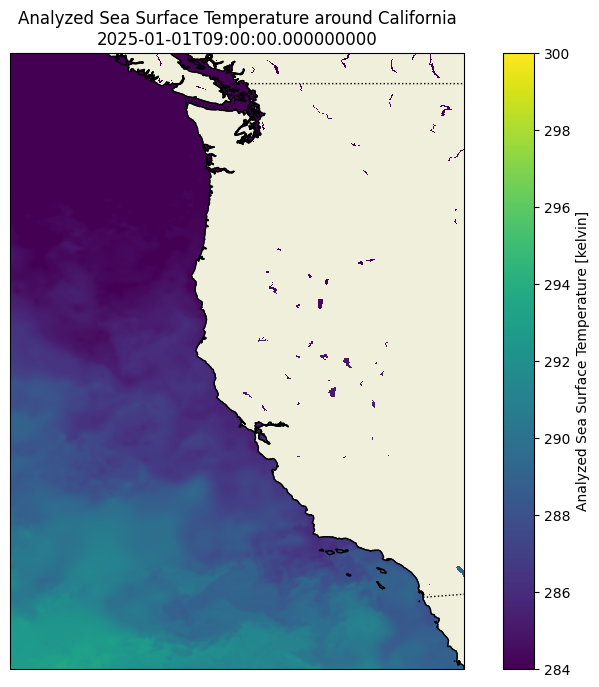

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the extent for the plot
lat_min, lat_max = 30.25, 49.99  # Approximate latitude range for California
lon_min, lon_max = -130.36, -115.80 # Approximate longitude range for California
extent = [lon_min, lon_max, lat_min, lat_max]

# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

# Create a color plot of the first frame
# Use pcolormesh for better performance with large datasets
cax = combined_sst_data.isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', add_colorbar=False, vmin=284, vmax=300)

# Add a colorbar
cbar = fig.colorbar(cax, ax=ax, orientation='vertical', label='Analyzed Sea Surface Temperature [kelvin]')

# Add a title that will be updated with the time
title = ax.set_title('Analyzed Sea Surface Temperature around California\n' + str(combined_sst_data.isel(time=0).time.values))

# Function to update the plot for each frame
def update(frame):
    cax.set_array(combined_sst_data.isel(time=frame).values.ravel())
    title.set_text('Analyzed Sea Surface Temperature around California\n' + str(combined_sst_data.isel(time=frame).time.values))
    return cax, title

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(len(combined_sst_data.time)), blit=True)

# Save the animation as a video
# To save the animation as a video, you'll need a video writer like ffmpeg.
# If you don't have it installed, you might need to run:
# !apt-get update && apt-get install ffmpeg
try:
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
    ani.save('sst_animation.mp4', writer=writer)
    print("Animation saved as sst_animation.mp4")
except KeyError:
    print("FFmpeg writer not found. Please install ffmpeg if you want to save the animation as a video.")
    print("You can usually install it by running: !apt-get update && apt-get install ffmpeg")

# Display the animation (optional, as it might take time to render)
# plt.rcParams['animation.embed_limit'] = 50.0
# HTML(ani.to_jshtml())

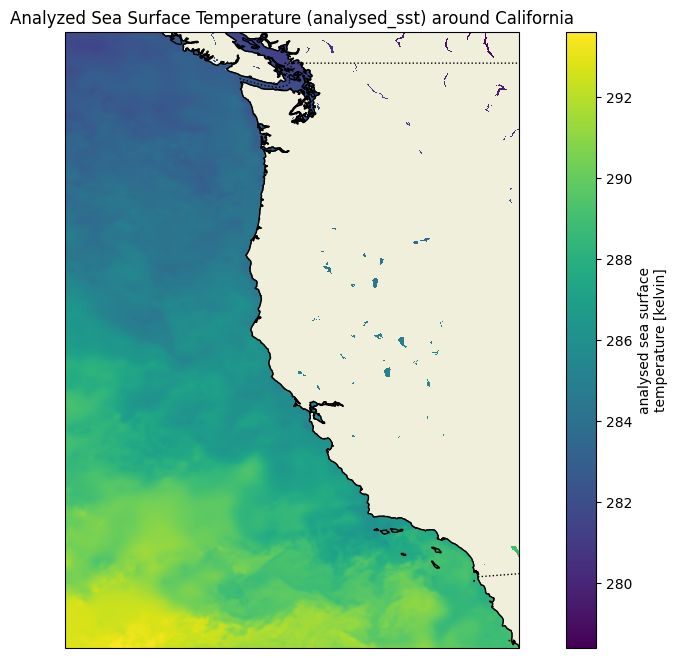

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Select the 'analysed_sst' variable
sst = ds['analysed_sst']

# Define the latitude and longitude boundaries for the California region
lat_min, lat_max = 30.25, 49.99  # Approximate latitude range for California
lon_min, lon_max = -130.36, -115.80 # Approximate longitude range for California

# Select the data for the specified region
sst_subset = sst.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))


# Create a figure and an axes with a specific projection
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot the subset data
sst_subset.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')

# Add coastlines and features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

# Set the extent of the map to the selected region
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())


# Set the title
ax.set_title('Analyzed Sea Surface Temperature (analysed_sst) around California')

# Show the plot
plt.show()

In [ ]:
!rm -r mur_data_test/